### Homework 2 STA 137 Applied Time Series Analysis
#### Dayanara Lebron Aldea #6292

In [48]:
#Read US crude oil production file 
#setwd("Downloads")
#install.packages('readxl')
library(readxl)

oil<-read_excel("UScrudeoil_prod.xls",sheet=2)
oil<-oil[-c(1,2),]
colnames(oil)<-c("Date","Production")
oil$Production<-as.numeric(oil$Production)
attach(oil)
t=seq(1,113,1)
head(oil)

The following objects are masked from oil (pos = 3):

    Date, Production

The following objects are masked from oil (pos = 4):

    Date, Production



Date,Production
182,63621
547,69389
912,88767
1277,100461
1643,117081
2008,134717


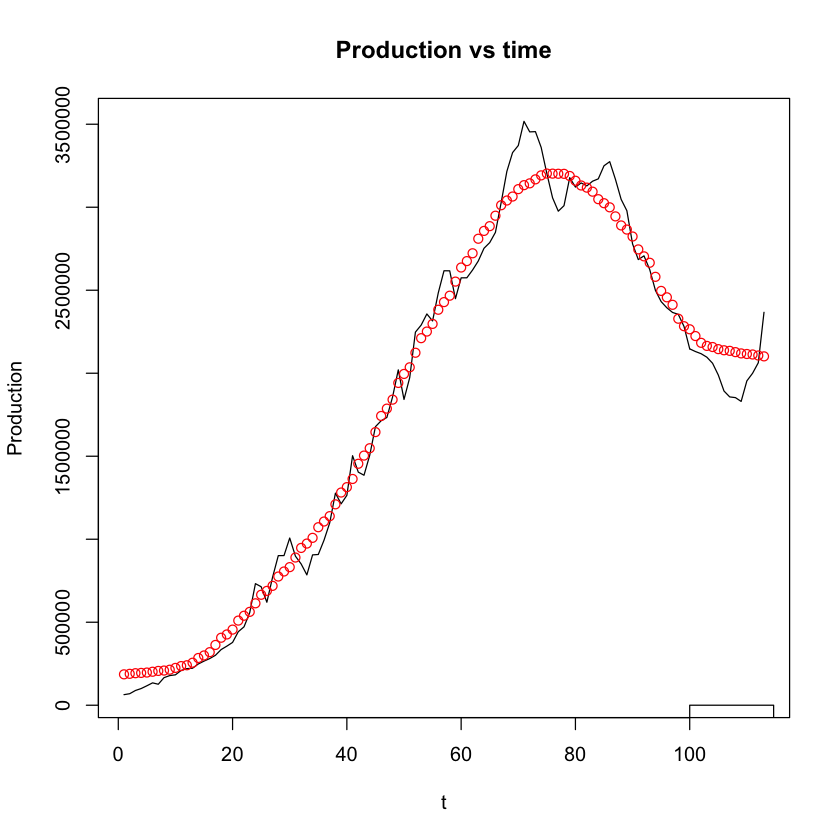

[1] 0.9853376

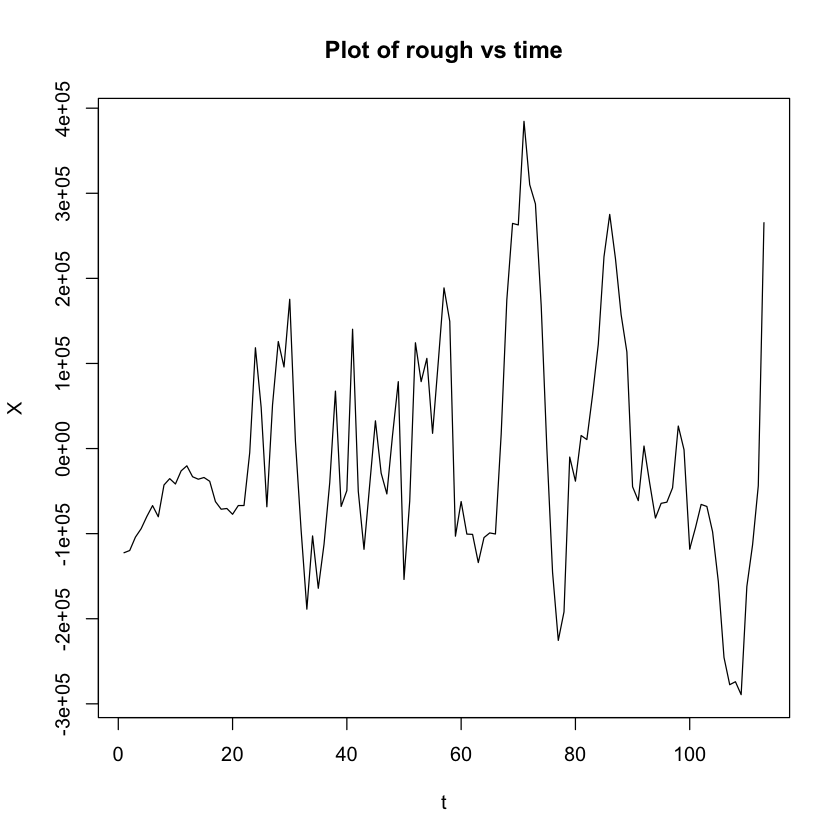

In [49]:
#a) Obtain trend estimate using loess method with span=0.25
trend.loess = loess(Production~t,span=0.25, degree = 0)
fit<-trend.loess$fitted
plot(t,Production, main="Production vs time", type="l")
points(t,fit,col="red")
legend(100,100,c("data","fit"))
#trend
X=trend.loess$residuals
plot(t,X,main="Plot of rough vs time", type="l")
rsq=1-(sum(X^2)/sum((Production-mean(Production))^2))
rsq



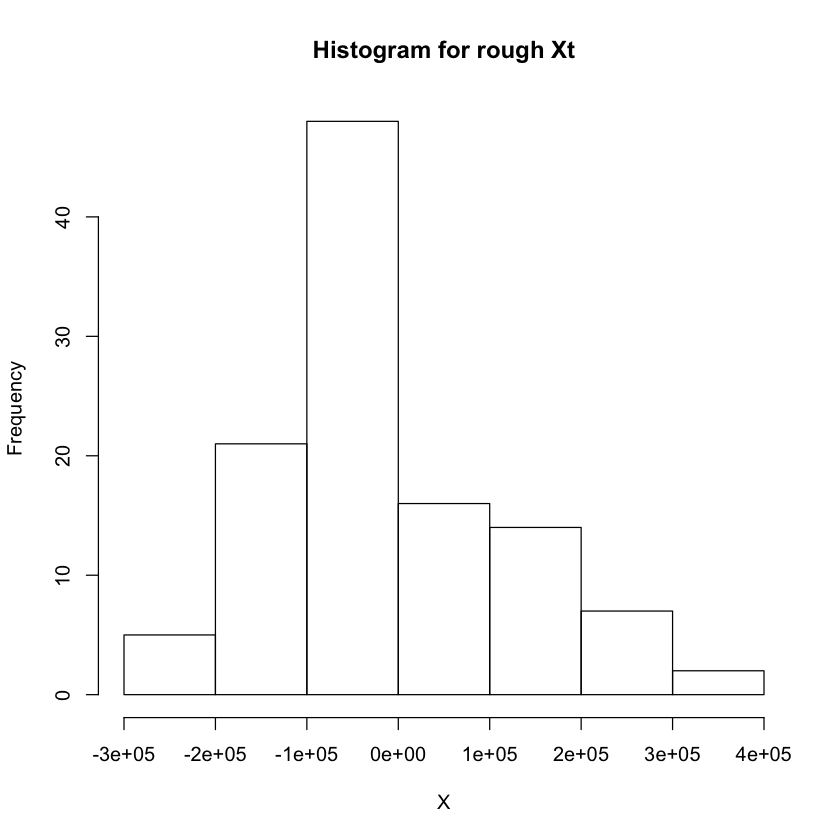

In [50]:
hist(X, main="Histogram for rough Xt")

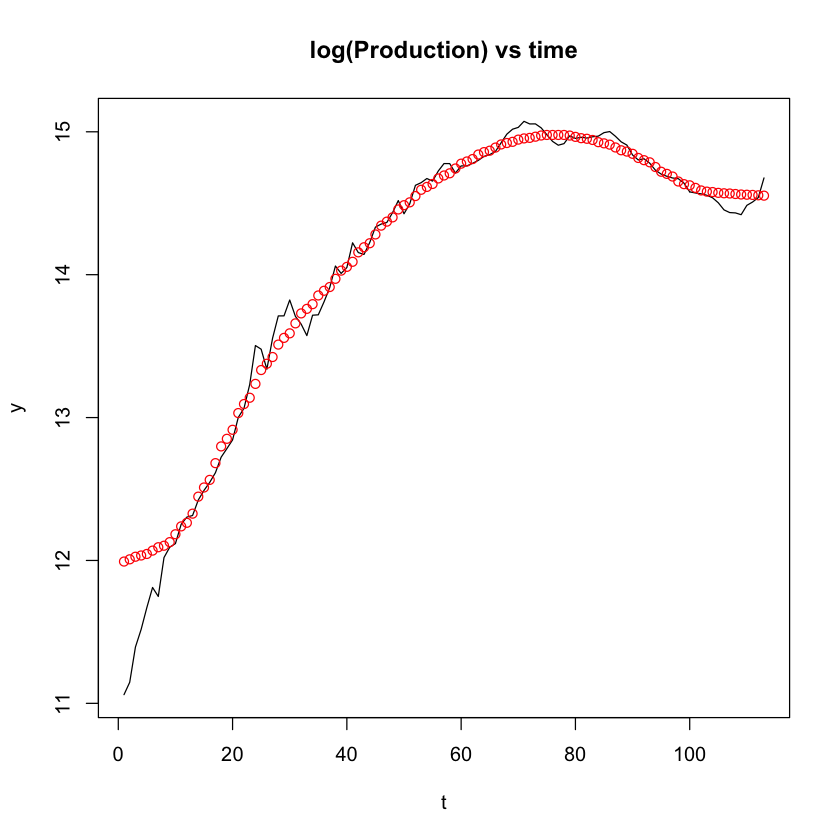

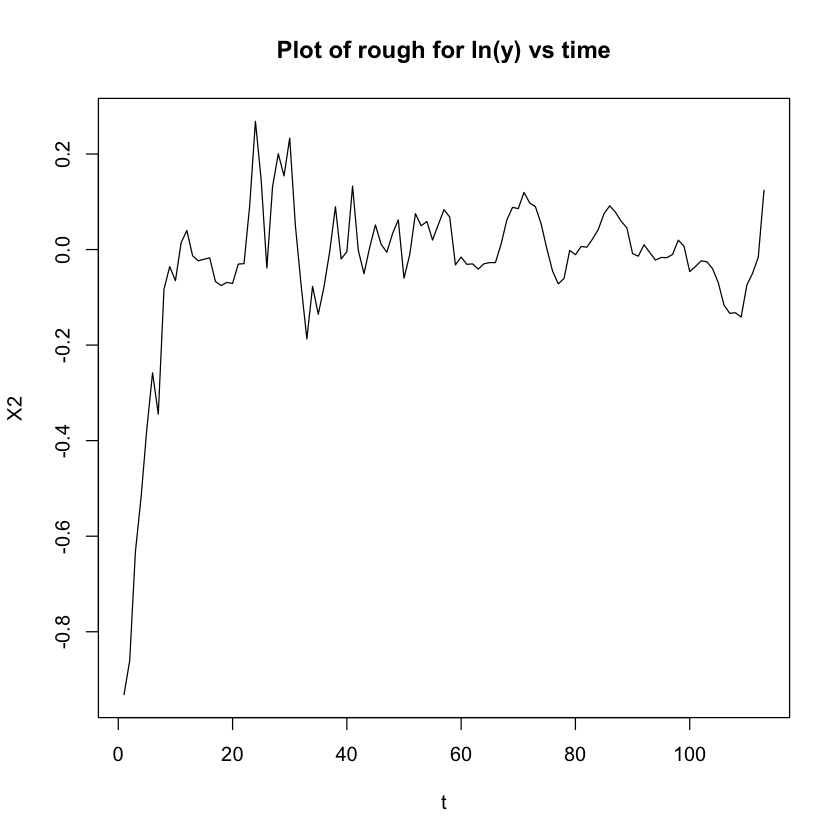

In [51]:

#b Repeat part b using ln(y)
y=log(Production)
trend2 = loess(y~t,span=0.25, degree = 0)
fit<-trend2$fitted
plot(t,y, main="log(Production) vs time", type="l")
points(t,fit,col="red")
X2=trend2$residuals
plot(t,X2,main="Plot of rough for ln(y) vs time", type="l")
rsq2=1-(sum(X2^2)/sum((y-mean(y))^2))


In [52]:
rsq2

[1] 0.9738702

## Given that the R-Squared for Xt coming from untransformed Yt is higher than ln(Y) I will work with Xt

0.985337648334834 > 0.973870228603362

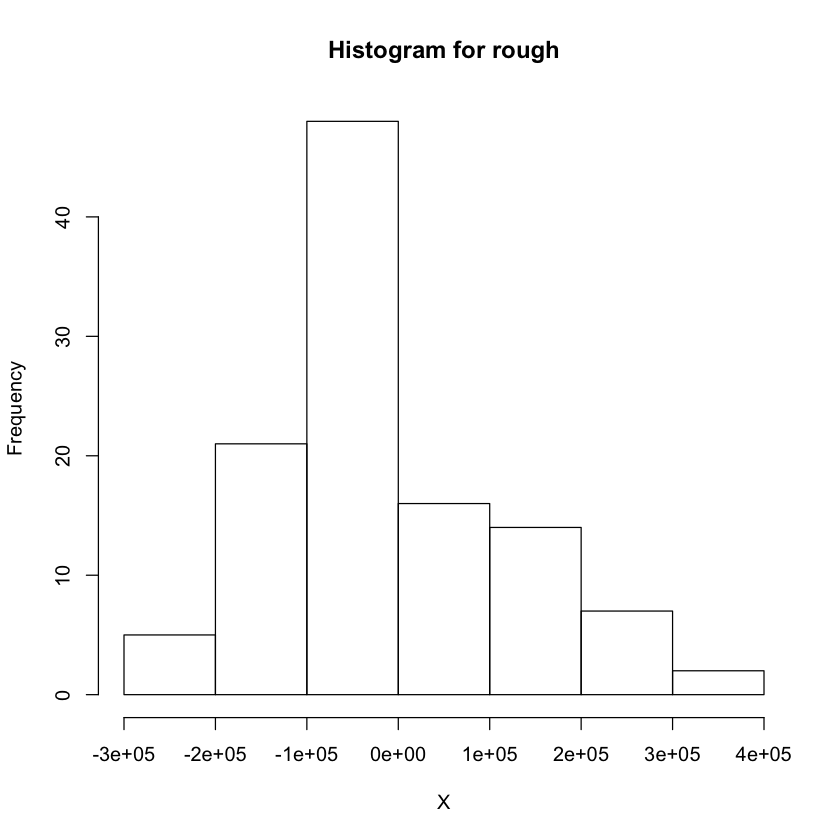

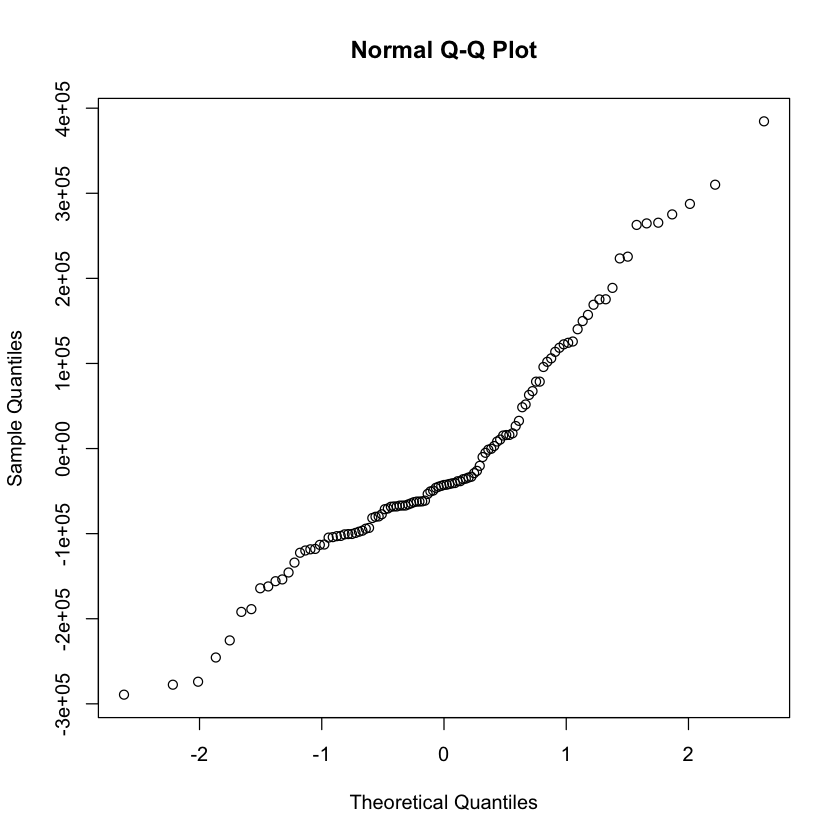

In [53]:
#c Obtain histogram of the rough. Obtain normal probability plot. 
hist(X, main="Histogram for rough")
qqnorm(X)


#### Thes graphics do not show any departure from linearity nor normality. 


Autocorrelations of series ‘X’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.753  0.511  0.333  0.123 -0.087 -0.211 -0.270 -0.286 -0.265 -0.148 

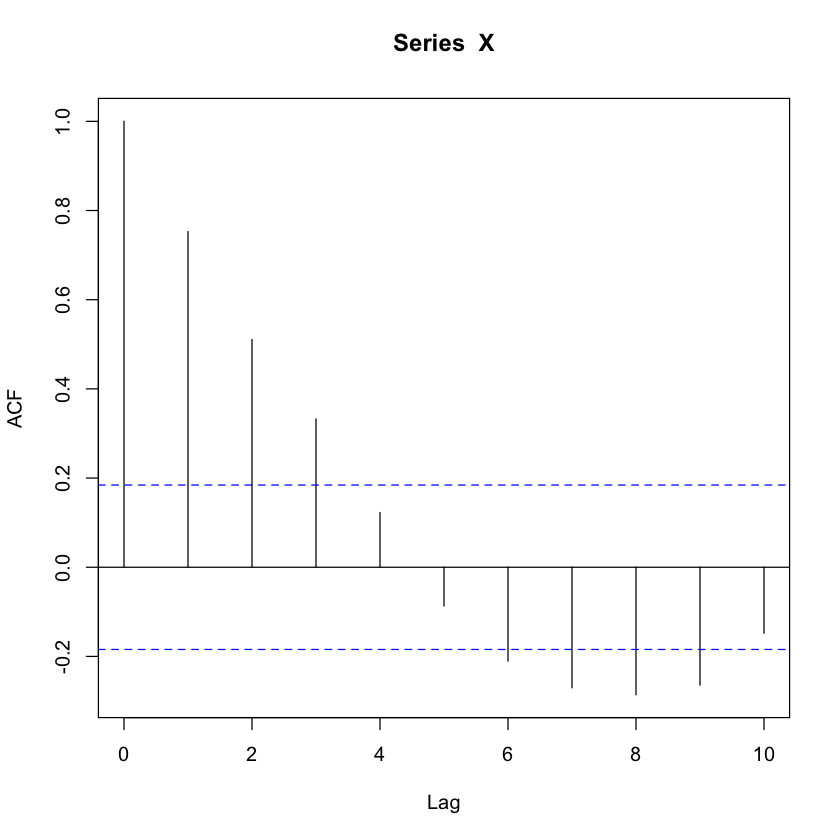

In [54]:
#d)Obtain the ACF plot for Xt up to order 10 along with the 1.96 bars
acf(X, lag.max=10)
autc<-acf(X, lag.max=10, plot=F)
autc


##### Graph indicates significant autocorrelations which means dependency per lags. 8/10 lags show dependency because they go outside the 1.96*sqrt(n) boundary

## d)Testing Dependency

In [55]:
#e Carry out Box-Lejeung test to check if the sequence of rough Xt are iid
#Ho= p_hat(j)=0 for j=1...10 Ha=not all equal 0
#Rehect if QBL > X^2 0.95,h
Box.test(X,lag=10,type='Ljung-Box')
qchisq(p = 0.95,df =10) #48.90 > 18.30 so we rejectH0 of independence.


	Box-Ljung test

data:  X
X-squared = 148.04, df = 10, p-value < 2.2e-16


[1] 18.30704

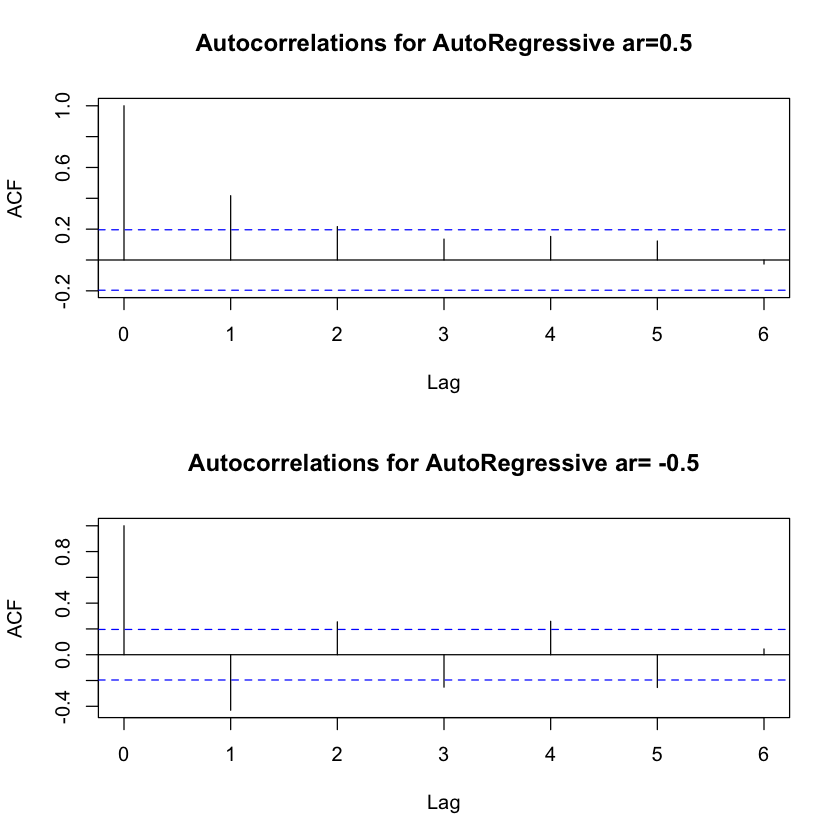

In [56]:
#2 AR(1) sequence as stated in the HW. Plot autocorrelations p(j) against j=0...6 when phi=0.5 and -0.5

#2AR(1)
par(mfrow=c(2,1))
s=arima.sim(n=100, model=list(ar=c(0.5)))
acf(s,lag.max=6, main="Autocorrelations for AutoRegressive ar=0.5")
s2=arima.sim(n=100, model=list(ar=c(-0.5)))
acf(s2,lag.max=6, main="Autocorrelations for AutoRegressive ar= -0.5")


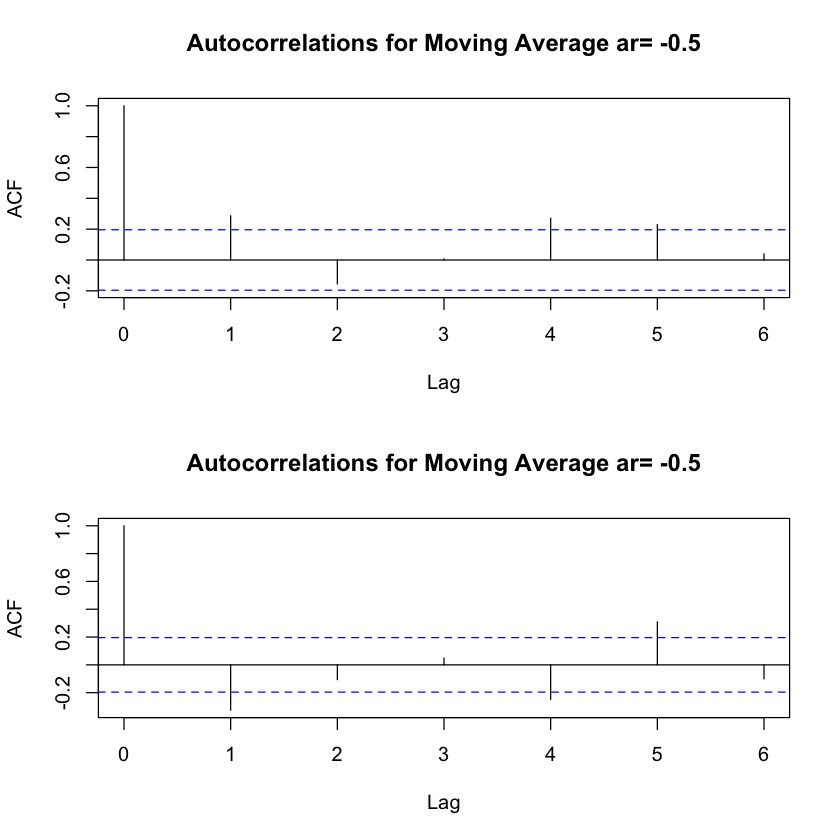

In [57]:
#2b As Stated in homework Consider a MA(1). Plot the autocorrelations when theta=0.5 and -0.5
#3 MA(1)
par(mfrow=c(2,1))
m=arima.sim(n=100, model=list(ma=c(0.5)))
m2=arima.sim(n=100, model=list(ma=c(-0.5)))
acf(m,lag.max=6, main="Autocorrelations for Moving Average ar= -0.5")
acf(m2,lag.max=6, main="Autocorrelations for Moving Average ar= -0.5")

#### Exercises 3a &b on paper